# Question 1 : What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?
# ANSWER
** 1. Fundamental Idea behind Ensemble Techniques:**
Ensemble techniques combine multiple individual models (weak learners) to form a stronger, more accurate model.
The key concept is that a group of diverse models, when combined properly, performs better than any single model alone.
Goal:
>>Reduce errors (bias and variance).
>>Improve accuracy, stability, and generalization of predictions.
** 2. Difference between Bagging and Boosting: **
                        Bagging
                    
>> Reduce variance and prevent overfitting.
>> Trains multiple models independently on different random subsets of the data.
>> Uses bootstrap sampling (random sampling with replacement).
>> All models contribute equally (simple averaging or voting).
>> All models contribute equally (simple averaging or voting).
>> Random Forest, Bagged Decision Trees.
>> Parallel – all models can be trained simultaneously.
                     Boosting
                  
>> Reduce bias and improve weak learners.
>> Trains models sequentially, each focusing more on previously misclassified samples.
>> Uses the entire dataset, but assigns higher weights to misclassified samples.
>> Each model gets a different weight based on its accuracy.
>> Reduces bias by iteratively improving weak models.
>> AdaBoost, Gradient Boosting, XGBoost.
>> Sequential – each model depends on the previous one.
                      

# Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.
# answer
Random Forest reduces overfitting by building many decision trees on random subsets of data and features, then combining their results through voting or averaging. This randomness makes trees less correlated and improves generalization.
# Two key hyperparameters:
** n_estimators: ** Number of trees — more trees reduce variance.
** max_features: **  Number of features used per split — limits correlation among trees and prevents overfitting.

# Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.
# answer
Stacking (Stacked Generalization) is an ensemble technique that combines predictions of multiple different models (base learners) using another model called a meta-learner. The meta-learner learns how to best combine the outputs of base models to improve overall performance.
# Difference from Bagging and Boosting:
** Bagging:**  Uses same model type, trained on random subsets of data (focuses on reducing variance).
** Boosting: ** Trains models sequentially, each correcting the errors of the previous one (focuses on reducing bias).
** Stacking:**  Uses different model types (e.g., Decision Tree, SVM, Logistic Regression) and combines their predictions via a meta-model (focuses on improving predictive power).
# Example Use Case:
In a classification task, you can combine predictions from a Decision Tree, SVM, and KNN, and use Logistic Regression as the meta-learner to make the final prediction — often improving accuracy over any single model.

# Question 4:What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?
# answer
OOB Score (Out-of-Bag Score) is an internal validation score used in Random Forests to estimate model performance without needing a separate validation set.
# Concept:
During training, each tree is built using a bootstrap sample (random sampling with replacement). About one-third of the data is not included in this sample — these are called Out-of-Bag (OOB) samples.
# How it’s useful:
>>Each OOB sample is used to test the tree that did not train on it.
>>The model’s OOB Score is the average accuracy (or error) on all OOB samples.
>>This provides an unbiased estimate of the model’s performance.
# Advantages:
>>No need for a separate validation or test set.
>>Saves data and computation time.
>>Gives a quick, reliable measure of generalization performance.

# Question 5: Compare AdaBoost and Gradient Boosting in terms of: ● How they handle errors from weak learners ● Weight adjustment mechanism ● Typical use cases
 # answer
                     ** AdaBoost **

>> Focuses more on misclassified samples by increasing their weights so that the next weak learner pays extra attention to them.
>> Adjusts sample weights — increases for misclassified points and decreases for correctly classified ones.
>> Works well for classification problems, especially with simple base models like decision stumps.


                    ** Gradient Boosting **

>> Trains each new learner to minimize the residual errors (difference between actual and predicted values) of the previous model.
>> Adjusts model weights by using gradient descent on a chosen loss function to reduce overall error.
>> Used for both classification and regression, often achieving higher accuracy (e.g., XGBoost, LightGBM).

# Question 6:Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.
# answer
CatBoost performs well on categorical features because it can natively handle them without requiring manual preprocessing like one-hot or label encoding.
** How it handles categorical variables: **

CatBoost uses a technique called "ordered target statistics" (or target encoding), where each categorical value is replaced with a numerical statistic (like mean target value) computed in an ordered and randomized way to prevent data leakage.
It also combines categorical features in different ways to capture feature interactions automatically.
** Why it’s effective: **
>> Avoids overfitting and data leakage.
>> Preserves useful information from categorical data.
>> Reduces preprocessing effort and improves model accuracy.


# Question 7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization Task: 1. Load the Wine dataset (sklearn.datasets.load_wine()). 2. Split data into 70% train and 30% test. 3. Train a KNN classifier (default K=5) without scaling and evaluate using:a. Accuracy b. Precision, Recall, F1-Score (print classification report) 4. Apply StandardScaler, retrain KNN, and compare metrics. 5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric(Euclidean, Manhattan). 6. Train the optimized KNN and compare results with the unscaled/scaled versions.
# answer


In [1]:
# Question 7: KNN Classifier - Wine Dataset Analysis with Optimization

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# 1. Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# 2. Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Train KNN (default K=5) without scaling
knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)

print("---- Without Scaling ----")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))

# 4. Apply StandardScaler and retrain KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n---- With StandardScaler ----")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

# 5. Use GridSearchCV to find best K (1 to 20) and distance metric
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("\n---- Grid Search Results ----")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# 6. Train optimized KNN and compare
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)

print("\n---- Optimized KNN ----")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


---- Without Scaling ----
Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


---- With StandardScaler ----
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


---- Grid Search Results ----
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11}
Best Cross-Validation Accuracy: 

# Question 8 : PCA + KNN with Variance Analysis and Visualization Task: 1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()). 2. Apply PCA and plot the scree plot (explained variance ratio). 3. Retain 95% variance and transform the dataset. 4. Train KNN on the original data and PCA-transformed data, then compare accuracy. 5. Visualize the first two principal components using a scatter plot (color by class).

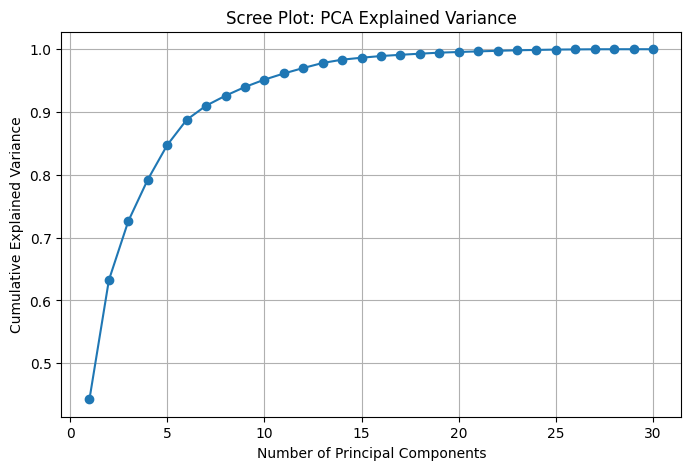

Number of components retained for 95% variance: 10

---- Accuracy Comparison ----
Original Data Accuracy: 0.9708
PCA-Reduced Data Accuracy: 0.9474


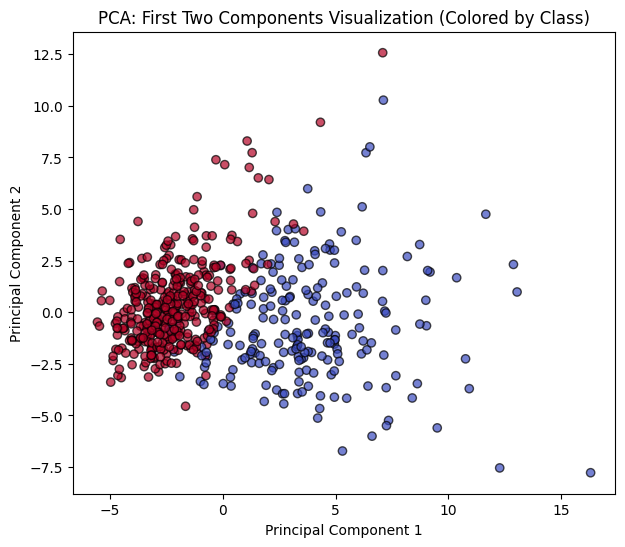

In [2]:
# Question 8: PCA + KNN with Variance Analysis and Visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize the data (important for PCA and KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA and plot the Scree Plot (Explained Variance Ratio)
pca_full = PCA()
pca_full.fit(X_scaled)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot: PCA Explained Variance')
plt.grid(True)
plt.show()

# 3. Retain 95% variance and transform the dataset
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)
print(f"Number of components retained for 95% variance: {pca_95.n_components_}")

# Split data into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.3, random_state=42, stratify=y)

# 4. Train KNN on original and PCA-transformed data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("\n---- Accuracy Comparison ----")
print(f"Original Data Accuracy: {acc_original:.4f}")
print(f"PCA-Reduced Data Accuracy: {acc_pca:.4f}")

# 5. Visualization of first two principal components
plt.figure(figsize=(7,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Components Visualization (Colored by Class)')
plt.show()


# Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data Task:1. Load the Pima Indians Diabetes dataset (contains missing values).2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.3. Train KNN using:a. Brute-force methodb. KD-Treec. Ball Tree4. Compare their training time and accuracy.5. Plot the decision boundary for the best-performing method (use 2 most importantfeatures).Dataset: Pima Indians Diabetes

Missing values before imputation:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

---- KNN Algorithm Comparison ----
   Algorithm  Accuracy  Training Time (s)
0      brute  0.744589           0.001142
1    kd_tree  0.744589           0.001678
2  ball_tree  0.744589           0.001793


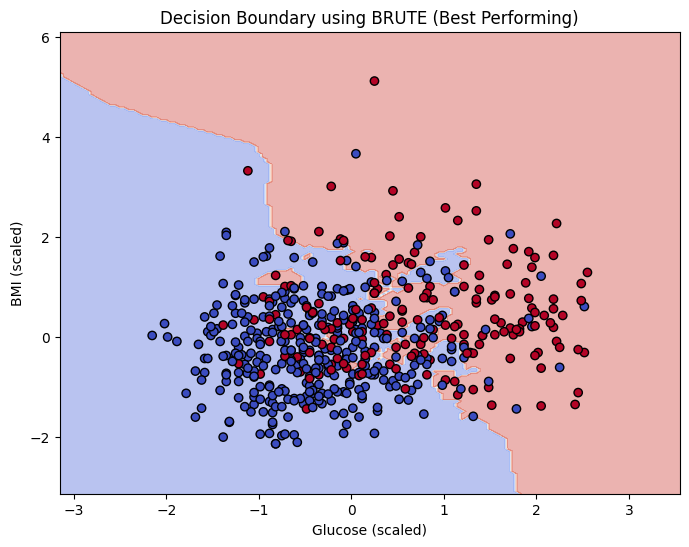

In [3]:
# Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_diabetes

# ---- STEP 1: Load Pima Indians Diabetes dataset ----
# If sklearn version doesn’t include Pima, load from CSV (UCI format)
# Sample file path: "pima-indians-diabetes.csv" (8 features + target)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=cols)

# Some columns have 0 as missing values, replace them with NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

print("Missing values before imputation:\n", df.isnull().sum())

# ---- STEP 2: KNN Imputation ----
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=cols)

print("\nMissing values after imputation:\n", df_imputed.isnull().sum())

# ---- Prepare Data ----
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# Split data into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- STEP 3: Train KNN using different algorithms ----
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = []

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start = time.time()
    knn.fit(X_train_scaled, y_train)
    train_time = time.time() - start
    acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    results.append((algo, acc, train_time))

# ---- STEP 4: Compare Training Time and Accuracy ----
results_df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy', 'Training Time (s)'])
print("\n---- KNN Algorithm Comparison ----")
print(results_df)

# ---- STEP 5: Decision Boundary Visualization ----
# Select 2 most important features: Glucose & BMI
feature_idx = [1, 5]  # indices of Glucose and BMI
X2 = X_train_scaled[:, feature_idx]
X2_test = X_test_scaled[:, feature_idx]

# Retrain using best-performing method
best_algo = results_df.loc[results_df['Accuracy'].idxmax(), 'Algorithm']
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X2, y_train)

# Plot decision boundary
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X2[:, 0], X2[:, 1], c=y_train, edgecolor='k', cmap='coolwarm')
plt.xlabel('Glucose (scaled)')
plt.ylabel('BMI (scaled)')
plt.title(f'Decision Boundary using {best_algo.upper()} (Best Performing)')
plt.show()


# Question 9:KNN Regressor with Distance Metrics and K-Value Analysis Task: 1. Generate a synthetic regression dataset(sklearn.datasets.make_regression(n_samples=500, n_features=10)).2. Train a KNN regressor with:a. Euclidean distance (K=5)b. Manhattan distance (K=5)c. Compare Mean Squared Error (MSE) for both.3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.


---- MSE Comparison (K=5) ----
Euclidean Distance MSE: 4837.04
Manhattan Distance MSE: 5428.59


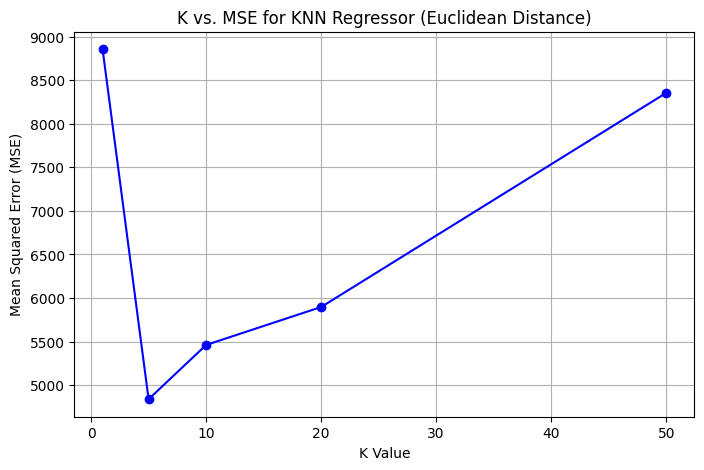

In [4]:
# Question 9: KNN Regressor with Distance Metrics and K-Value Analysis

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# ---- STEP 1: Generate synthetic regression dataset ----
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- STEP 2: KNN Regressor with Euclidean and Manhattan distance ----
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("---- MSE Comparison (K=5) ----")
print(f"Euclidean Distance MSE: {mse_euclidean:.2f}")
print(f"Manhattan Distance MSE: {mse_manhattan:.2f}")

# ---- STEP 3: Analyze K vs. MSE ----
k_values = [1, 5, 10, 20, 50]
mse_list = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse_list.append(mean_squared_error(y_test, y_pred))

# Plot K vs. MSE
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_list, marker='o', color='blue')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('K vs. MSE for KNN Regressor (Euclidean Distance)')
plt.grid(True)
plt.show()
